In this assignment, you will use the distribution fitting techniques you learned to simulate a production system. The following code block imports some libraries that may be needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st
import seaborn as sns
sns.set_style('whitegrid')

import OM527_functions as omf

Consider a production system where three components, parts $a$, $b$, and $c$, are assembled together to create a finished product. Suppose that you have historical data for the shipment lead times for the components and the time required to assemble the components into the finished product. Such samples are generated in the following code block. Specifically:

- `part_a_lt_observations` is a 300-observation sample for the delivery lead time of part $a$,
- `part_b_lt_observations` is a 300-observation sample for the delivery lead time of part $b$,
- `part_c_lt_observations` is a 300-observation sample for the delivery lead time of part $c$, and
- `production_time_observations` is a 300-observation sample for the assembly time.

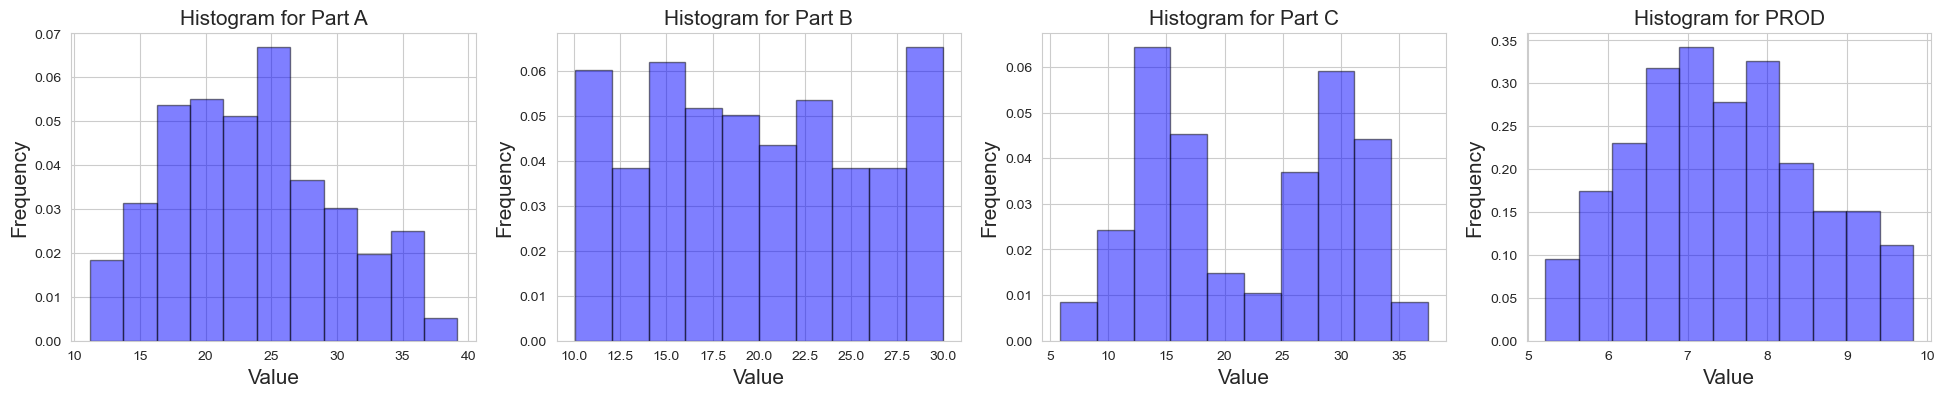

In [2]:
np.random.seed(0)
num_observations = 300

part_a_lt_observations = np.random.triangular(left = 10, 
                                              mode = 20, 
                                              right = 40, 
                                              size = num_observations)

part_b_lt_observations = np.random.uniform(low = 10,
                                           high = 30, 
                                           size = num_observations)

part_c_lt_observations = np.random.normal(loc = 15, 
                                          scale = 3, 
                                          size = num_observations//2)
part_c_lt_observations = np.append(part_c_lt_observations, 
                                   np.random.normal(loc = 30, 
                                                    scale = 3, 
                                                    size = num_observations//2))
np.random.shuffle(part_c_lt_observations)

production_time_observations = np.random.triangular(left = 5, 
                                                    mode = 7, 
                                                    right = 10, 
                                                    size = num_observations)

plot_var_dict = {
    'Part A': part_a_lt_observations,             
    'Part B': part_b_lt_observations,
    'Part C': part_c_lt_observations,
    'PROD': production_time_observations,
}

num_cols = len(plot_var_dict)
fig, ax = plt.subplots(1, num_cols, figsize = (6*num_cols, 4))

for (current_key, current_val), current_ax in zip(plot_var_dict.items(), ax):
    current_ax.hist(current_val,  
            bins = 'auto', 
            edgecolor = 'k', 
            color = 'blue',
            alpha = 0.5,
            density = True)
    
    current_ax.set_xlabel('Value', fontsize = 15)
    current_ax.set_ylabel('Frequency', fontsize = 15)
    current_ax.set_title(f'Histogram for {current_key}', fontsize = 15)

plt.show()

Use the observations provided to perform a Monte Carlo simulation of the order receipt and manufacturing process for a single part. For this simulation, generate **1,000** samples and **assume** there are no components on hand. Use the simulation results to:
1. Visualize the distribution for the length of the order receipt and manufacturing process **(55 points)**,
2. Identify the lead time quotes that will ensure service levels of 90%, 95%, and 99%, **(15 points)**
3. Identify a single part (a, b, or c) that will offer the greatest reduction in the length of the order receipt and delivery process if inventory were held. **(30 points)**